In [1]:
from PIL import Image
from pathlib import Path
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

## File Size (`.png`)
Compression.

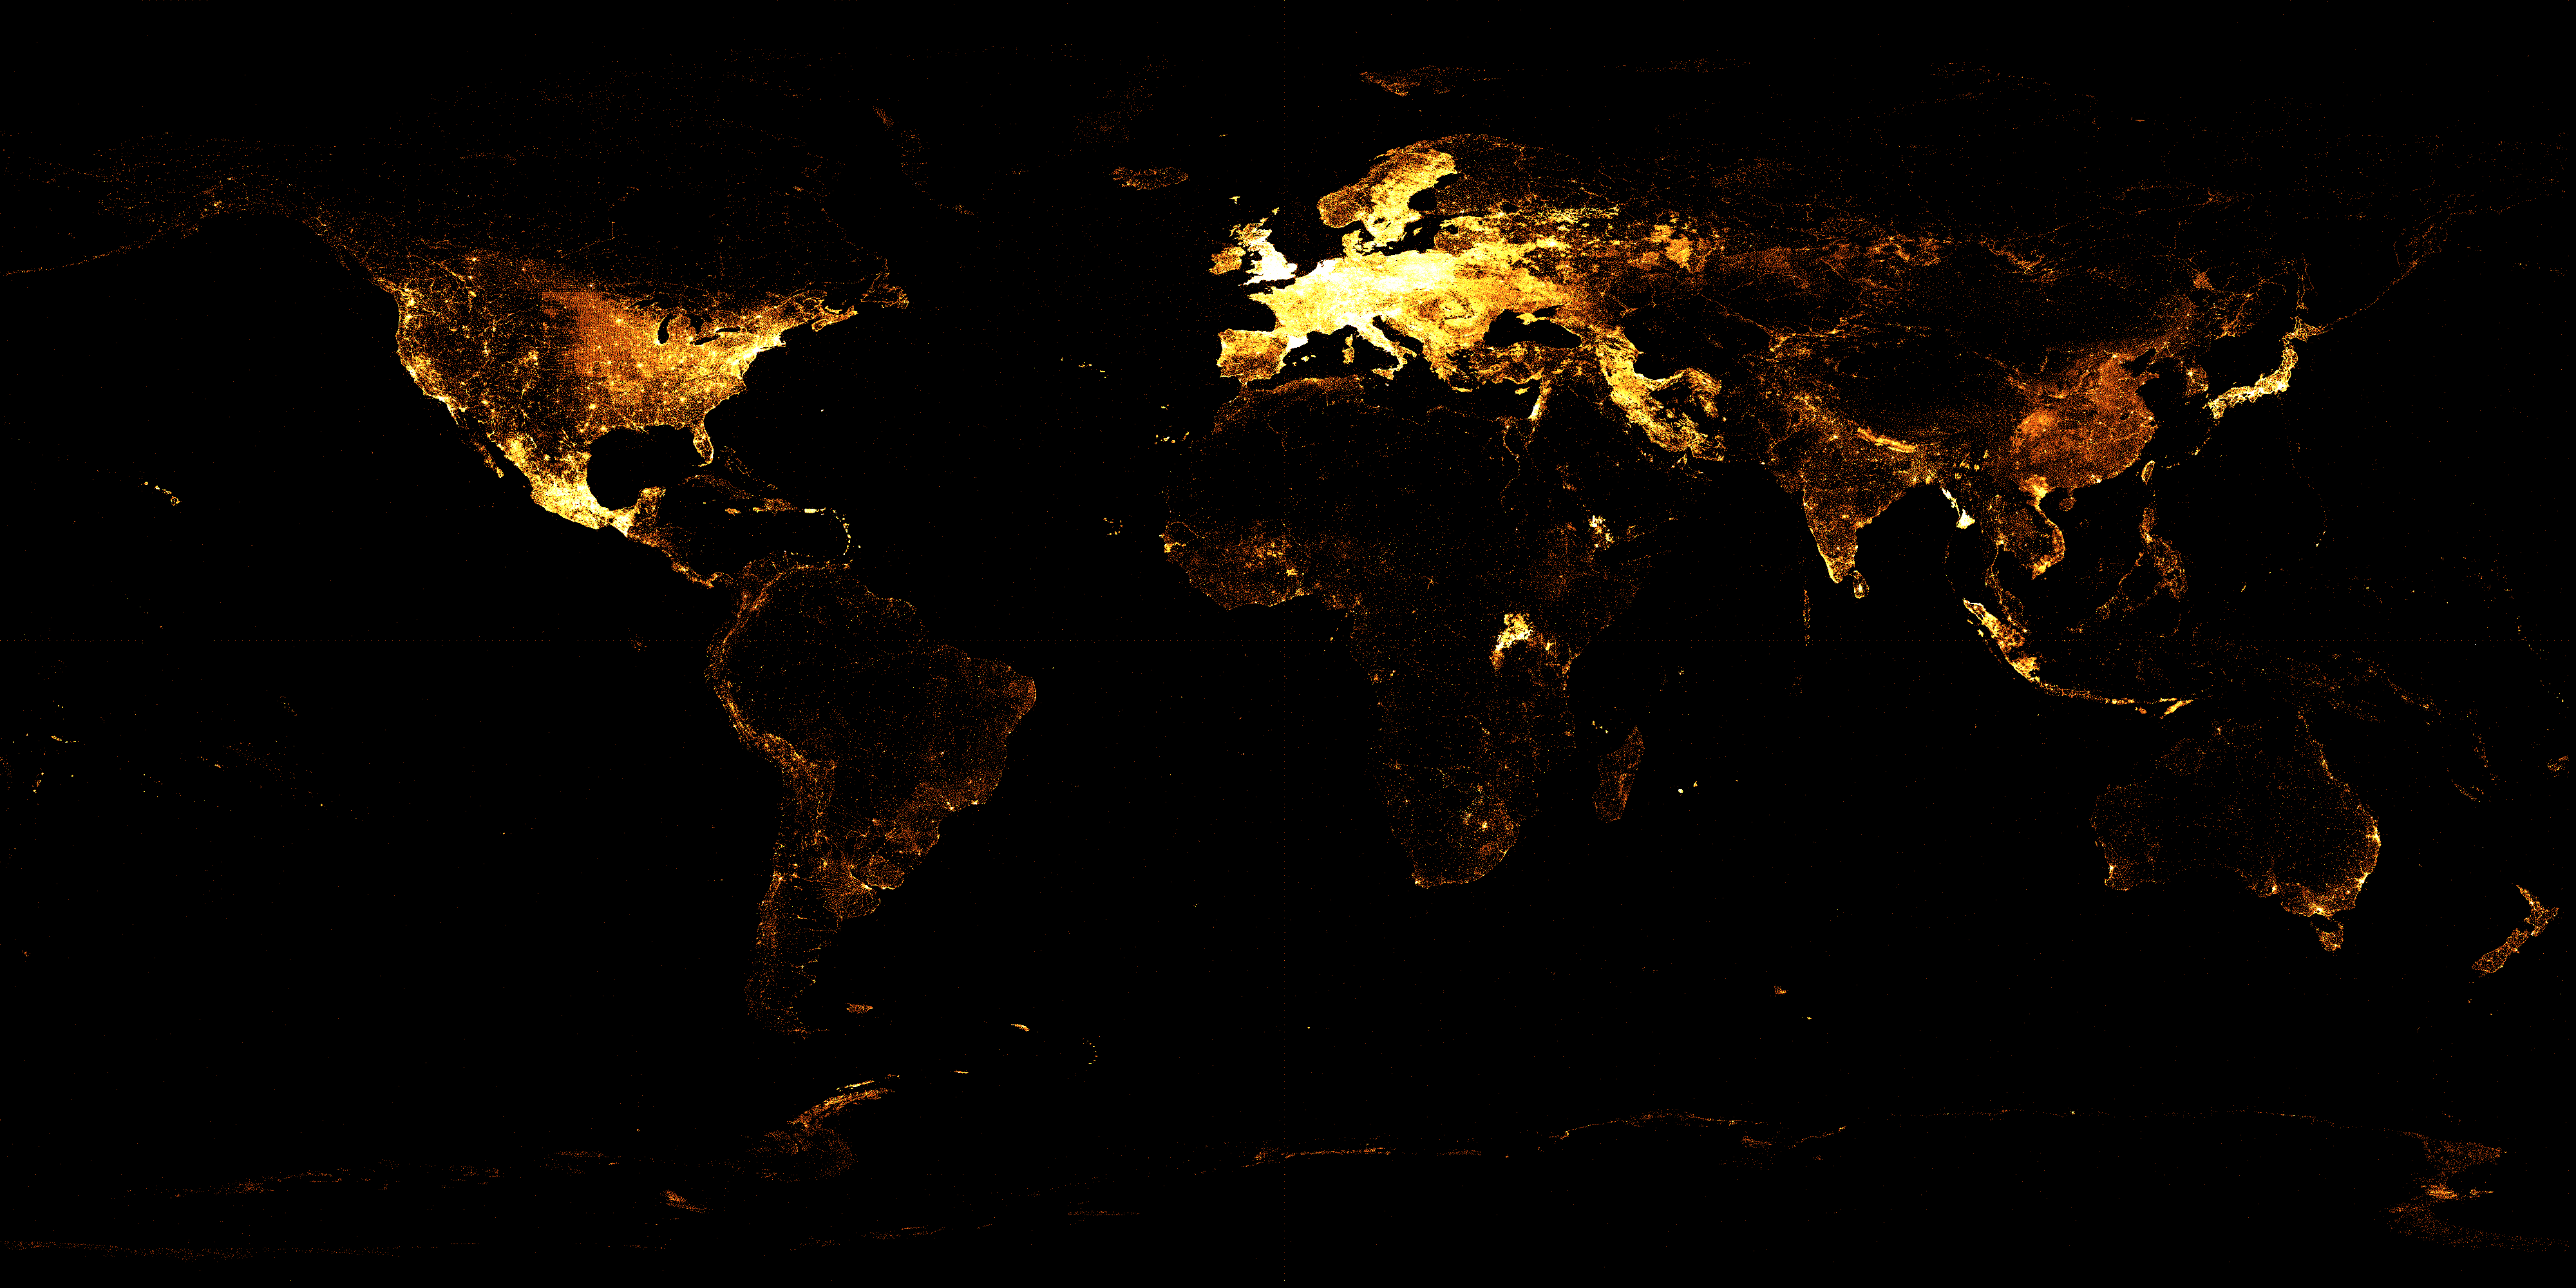

In [3]:
## Try both images to be more objective
#path_image = Path("pig.png")
path_image = Path("wikidata_map_april_2016_big.png")
image_PIL = Image.open(path_image)
image_PIL

In [4]:
type(image_PIL)

PIL.PngImagePlugin.PngImageFile

### `PIL`'s Compression
We know that `cv2` will <s>**increase**</s> **modify** (i.e. sometimes increase, sometimes decrease) the file size of a `.png` file if we only **naively** read in and write out:

In [5]:
image_cv2 = cv2.imread(str(path_image))
path_save_cv2_000 = Path(f"./{path_image.stem}_cv2_000{path_image.suffix}")
cv2.imwrite(str(path_save_cv2_000), image_cv2)
!du -hsx $path_save_cv2_000 $path_image

1.1M	wikidata_map_april_2016_big_cv2_000.png
528K	wikidata_map_april_2016_big.png


Would `PIL` have the same problem?

In [6]:
path_save_PIL_000 = Path(f"./{path_image.stem}_PIL_000{path_image.suffix}")
image_PIL.save(path_save_PIL_000)

In [7]:
!du -hsx $path_save_PIL_000 $path_image

532K	wikidata_map_april_2016_big_PIL_000..png
528K	wikidata_map_april_2016_big.png


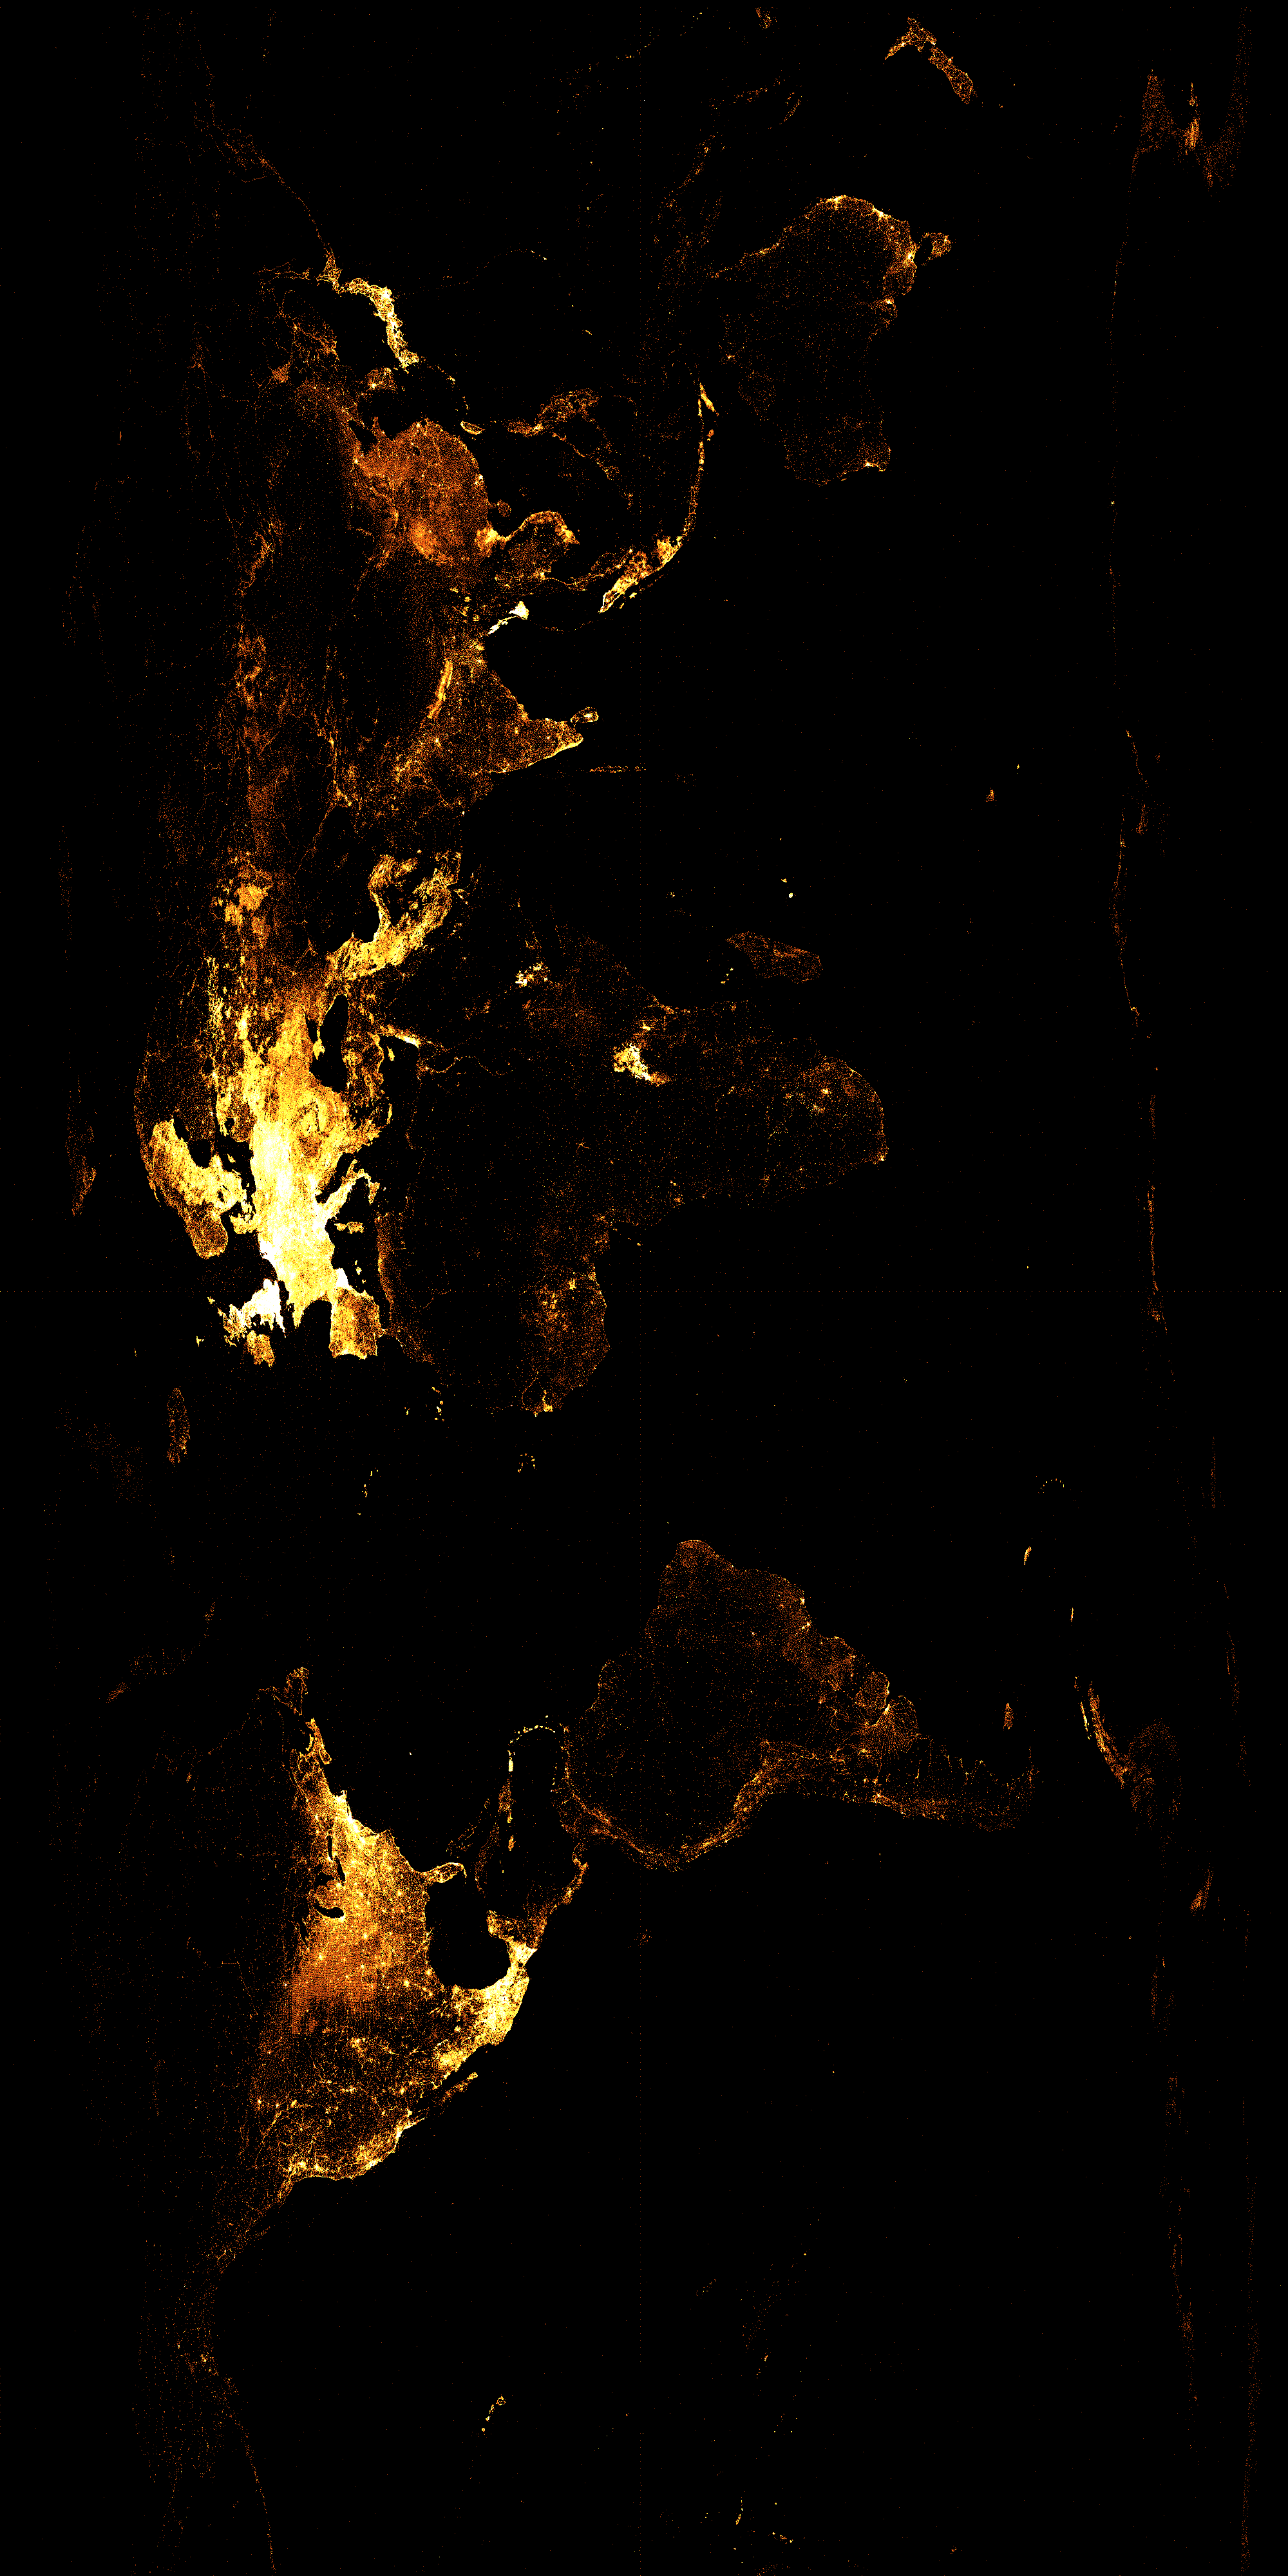

In [8]:
image_PIL_090 = image_PIL.transpose(Image.ROTATE_90)
image_PIL_090

In [9]:
type(image_PIL_090), type(image_PIL)

(PIL.Image.Image, PIL.PngImagePlugin.PngImageFile)

In [10]:
path_save_PIL_090 = Path(f"./{path_image.stem}_PIL_090{path_image.suffix}")
image_PIL_090.save(path_save_PIL_090)

In [11]:
!du -hsx $path_save_PIL_090 $path_image

556K	wikidata_map_april_2016_big_PIL_090..png
528K	wikidata_map_april_2016_big.png


It seems that `PIL` has an extra layer of assurance to assure that the saved file's file size would remain **of similar size**. (Or `PIL` simply makes its best to compress the image.)

Seeing is believing. Let's actually load the image using HTML to see if it is rotated.

`<img src="pig_PIL_090.png" width=200px/>`
<img src="pig_PIL_090.png" width=200px/>

**(?)** What if we pass an ndarray (read via `cv2` or `plt`) to `PIL` and save it (via `PIL` of course)? Will the file size get largely modified like with `cv2.imwrite`?<br>
**(R)** No.

In [12]:
image_PIL_from_cv2 = Image.fromarray(image_cv2[...,::-1])
type(image_PIL_from_cv2)

PIL.Image.Image

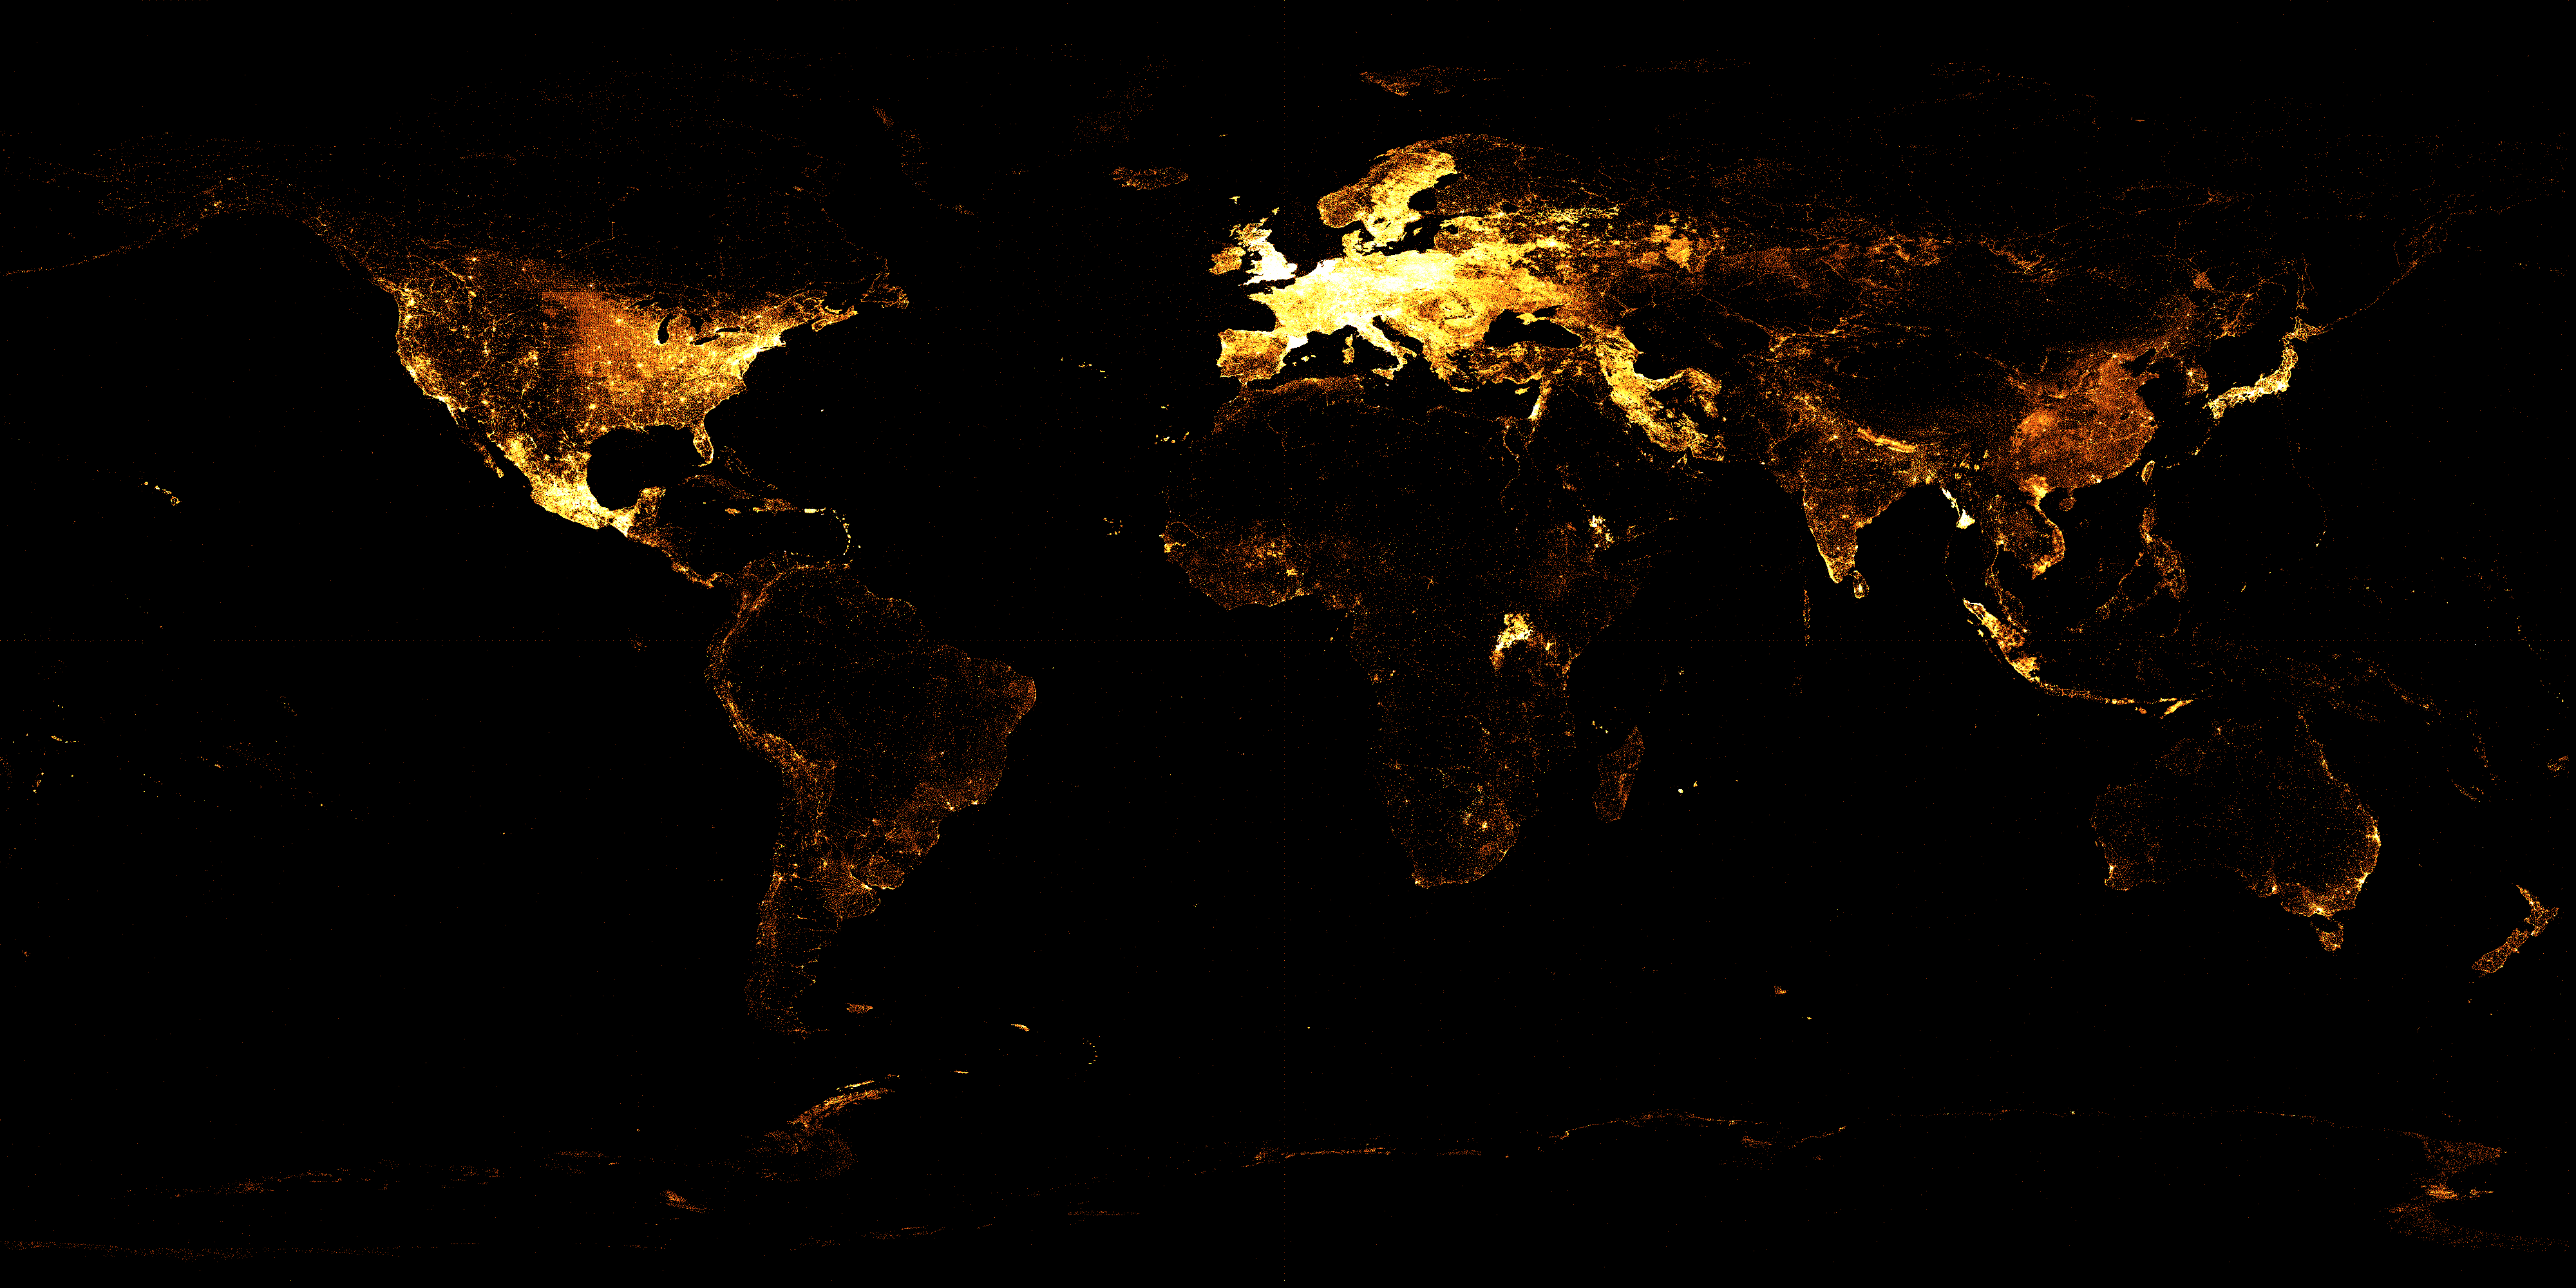

In [13]:
image_PIL_from_cv2

In [15]:
path_save_PIL_from_cv2 = Path(f"./{path_image.stem}_PIL_from_cv2{path_image.suffix}")
image_PIL.save(path_save_PIL_from_cv2)
!du -hsx $path_save_PIL_from_cv2 $path_image

532K	wikidata_map_april_2016_big_PIL_from_cv2.png
528K	wikidata_map_april_2016_big.png


**(?)** Can `cv2.imwrite` reach the same level of compression when the compression parameters are specified?<br>
**(R)** It also compresses a lot, but seems to be inferior to `PIL`.

In [24]:
[s for s in dir(cv2) if s.startswith("IMWRITE_PNG")]

['IMWRITE_PNG_BILEVEL',
 'IMWRITE_PNG_COMPRESSION',
 'IMWRITE_PNG_STRATEGY',
 'IMWRITE_PNG_STRATEGY_DEFAULT',
 'IMWRITE_PNG_STRATEGY_FILTERED',
 'IMWRITE_PNG_STRATEGY_FIXED',
 'IMWRITE_PNG_STRATEGY_HUFFMAN_ONLY',
 'IMWRITE_PNG_STRATEGY_RLE']

In [25]:
compression_params = [cv2.IMWRITE_PNG_COMPRESSION, 5]
cv2.imwrite(str(path_save_cv2_000), image_cv2, compression_params)
!du -hsx $path_save_cv2_000 $path_image

560K	wikidata_map_april_2016_big_cv2_000.png
528K	wikidata_map_april_2016_big.png
